Zadanie 1
<br>
Uruchomić 
- naive_multiplication(A,B)
- better_multiplication(A,B)
- mnożenie BLAS w Julii (A*B) 

dla coraz większych macierzy kwadratowych i zmierzyć czasy. Narysować wykres zależności czasu od rozmiaru macierzy wraz z słupkami błędów. Wszystkie trzy metody powinny być na jednym wykresie. Do analizy danych można użyć wybranego narzędzia (Julia, R)

In [1]:
# mnożenie macierzy - wersja naiwna
function naive_multiplication(A,B)
    C = zeros(Float64, size(A,1), size(B,2))
    for i=1:size(A,1)
        for j=1:size(B,2)
            for k=1:size(A,2)
                C[i,j] = C[i,j] + A[i,k]*B[k,j]
            end
        end
    end
    C
end

# poprawiona funkcja korzytająca z powyższego oraz z faktu, że
# można zmieniać kolejność operacji dodawania (a co za tym idzie kolejnosc petli).
function better_multiplication(A, B)
    C = zeros(Float64, size(A,1), size(B,2))
    for j=1:size(B,2)
        for k=1:size(A,2)
            for i=1:size(A,1)
                C[i,j] = C[i,j] + A[i,k]*B[k,j]
            end
        end
    end
    C
end

better_multiplication (generic function with 1 method)

In [2]:
using DataFrames

df = DataFrame(Size = Int[], Type = String[], Time = Float64[])

for i in 100:20:300
    for j in 1:1:10
        A = rand(i, i)
        B = rand(i, i)
        time1 = @elapsed naive_multiplication(A, B)
        push!(df, (i, "naive", time1))
        time2 = @elapsed better_multiplication(A, B)
        push!(df, (i, "better", time2))
        time3 = @elapsed A * B
        push!(df, (i, "blas", time3))
    end
end

df

Row,Size,Type,Time
,Int64,String,Float64
1,100,naive,0.0024539
2,100,better,0.000816
3,100,blas,0.0001982
4,100,naive,0.0020664
5,100,better,0.0008245
6,100,blas,0.0001816
7,100,naive,0.0020691
8,100,better,0.0008306
9,100,blas,0.0002121


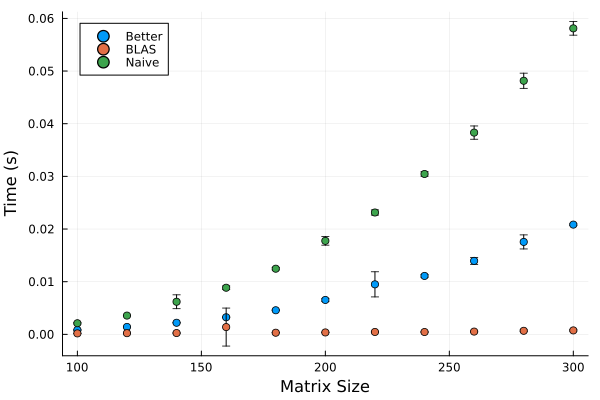

In [3]:
using Statistics, Plots

df_grouped = groupby(df, [:Size, :Type])
df_forplot = combine(df_grouped, "Time" => mean, "Time" => std)

scatter(
    df_forplot.Size,
    df_forplot.Time_mean,
    yerr=df_forplot.Time_std,
    group=df_forplot.Type,
    xlabel="Matrix Size",
    ylabel="Time (s)",
    label=["Better" "BLAS" "Naive"],
    markershape=:circle,
    markersize=4,
)

Zadanie 2
<br>
Napisać w języku C:
   - naiwną metodę mnożenia macierzy kwadratowych (wersja 1) 
   - ulepszoną wersję za pomocą zamiany pętli metodę mnożenia macierzy (wersja 2), pamiętając, że w C macierz przechowywana jest wierszami (row major order tzn A11,A12, ..., A1m, A21, A22,...,A2m, ..Anm), inaczej niż w Julii ! 
   - skorzystać z  możliwości BLAS poziom 3 dostępnego w GSL  (przykład uzycia https://www.gnu.org/software/gsl/doc/html/blas.html#examples )
    
    Należy porównywać działanie tych trzech algorytmow bez włączonej opcji optymalizacji kompilatora. Przedstawić wyniki na jednym wykresie tak jak w p.1. (osobno niż p.1). 
    
    Do analizy danych można użyć wybranego narzędzia (Julia, R)
    
    *(Dla chętnych)* sprawdzić, co się dzieje, jak włączymy optymalizację kompilatora i dodać do wykresu. 

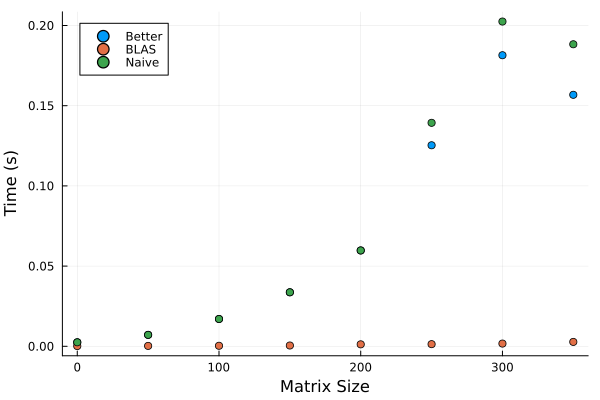

In [4]:
using CSV

df_c = CSV.read("results.csv", delim=",", DataFrame)

df_c_grouped = groupby(df_c, [:Size, :Type])
df_c_forplot = combine(df_c_grouped, "Time" => mean)

scatter(
    df_c_forplot.Size,
    df_c_forplot.Time_mean,
    group=df_c_forplot.Type,
    xlabel="Matrix Size",
    ylabel="Time (s)",
    label=["Better" "BLAS" "Naive"],
    markershape=:circle,
    markersize=4,
)

Zadanie 3
<br>
Użyć aproksymacji odpowiednimi wielomianami, które najlepiej pasują do zależności czasowych każdego z algorytmów. Stopień wielomianu powinien zgadzać się z teoretyczną złożonoscią. Dodać wykresy uzyskanych wielomianów do wcześniejszych wykresów. Do analizy danych można użyć wybranego narzędzia (Julia, R)

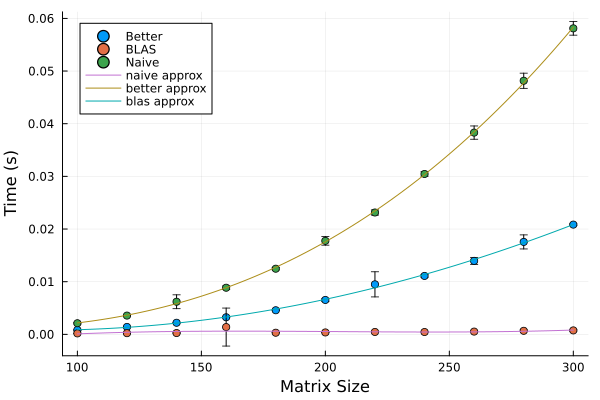

In [5]:
using Polynomials

df_blas = filter(row -> row.Type == "blas", df_forplot)
df_naive = filter(row -> row.Type == "naive", df_forplot)
df_better = filter(row -> row.Type == "better", df_forplot)

xs = 100:1:300

fit1 = fit(df_blas.Size, df_blas.Time_mean, 3)
fit2 = fit(df_naive.Size, df_naive.Time_mean, 3)
fit3 = fit(df_better.Size, df_better.Time_mean, 3)

scatter(
    df_forplot.Size,
    df_forplot.Time_mean,
    yerr=df_forplot.Time_std,
    group=df_forplot.Type,
    xlabel="Matrix Size",
    ylabel="Time (s)",
    label=["Better" "BLAS" "Naive"],
    markershape=:circle,
    markersize=4,
)

plot!(fit1,extrema(xs)...,label="naive approx")
plot!(fit2,extrema(xs)...,label="better approx")
plot!(fit3,extrema(xs)...,label="blas approx")


Zadanie 4
<br>
Pokazać zniwelowanie efektu Rungego  poprzez użycie wsparcia dla wielomianów Czebyszewa w pakiecie Polynomials. Wymagany wykres.

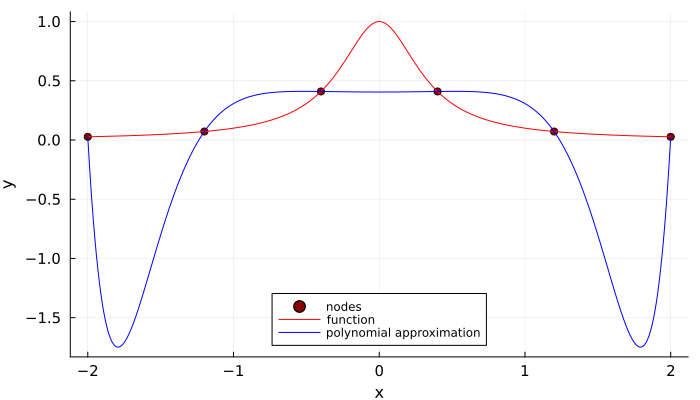

In [6]:
function func(x)
    1/(1+9x^2)
end

xs = -2:0.8:2
ys = [func(x) for x in xs]
poly_approx = fit(xs,ys,10)
xsf = -2:0.01:2
ysf = [poly_approx(x) for x in xsf]

scatter(
    xs,
    ys,
    xtickfontsize=10, 
    ytickfontsize=10, 
    titlefontsize = 11,
    label="nodes",
    legend_position=:bottom,
    size=(700,400),
    color = :darkred,
    xlabel = "x",
    ylabel = "y"
)

plot!(
    func,
    extrema(xs)...,
    label="function",
    color = :red
)

plot!(
    xsf,
    ysf,
    label="polynomial approximation",
    color = :blue
)

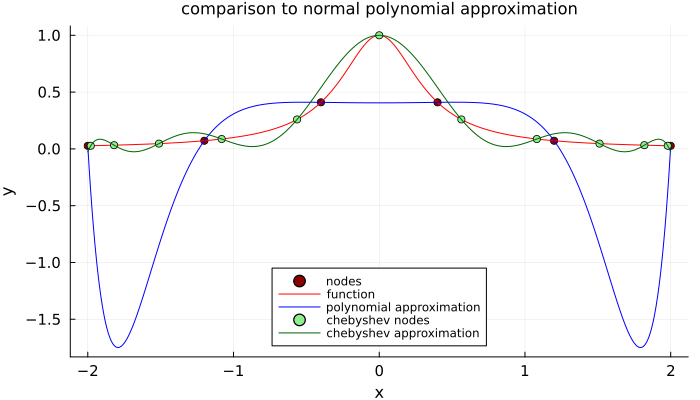

In [7]:
# upgrade using Chebyshev (https://byc-matematykiem.pl/tajniki-interpolacji-czesc-9/)

coeffs = [0,0,0,0,0,0,0,0,0,0,0,1]
chebyshev = ChebyshevT(coeffs)
nodes = 2 * Polynomials.roots(chebyshev)
ys2 = [func(x) for x in nodes]
poly_approx_2 = fit(nodes,ys2,10)

scatter!(
    nodes, 
    ys2, 
    label = "chebyshev nodes",
    color = :lightgreen, 
    title="comparison to normal polynomial approximation",
)

ysf2 = [poly_approx_2(x) for x in xsf]
plot!(
    xsf,
    ysf2, 
    label = "chebyshev approximation",
    color = :darkgreen
)

Zadanie 5
<br>
Przybliżenie Pade jest często lepsze niż rozwinięcie w szereg Taylora przy aproksymowaniu funkcji, które posiadają osobliwości. Korzystając ze wsparcia dla aproksymacji Pade w pakiecie Polynomials pokazać dowolny przykład (wraz z wykresem), gdzie takie przybliżenie faktycznie jest lepsze. Można odtworzyć wykres z wykładu albo zainspirować się przykładowym artykułem https://www.hindawi.com/journals/ijcm/2014/587430/ 

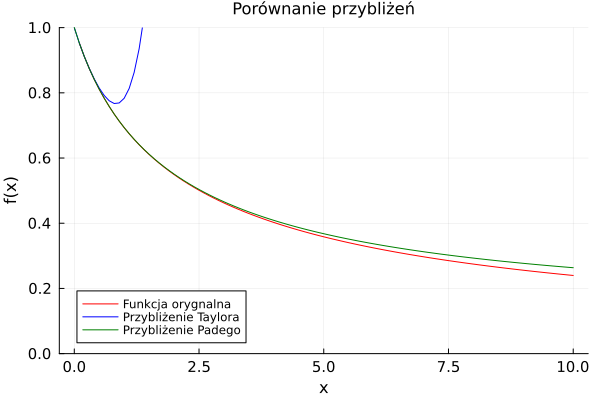

In [8]:
using TaylorSeries

function test(x)
    log(1+x)/x
end

t = Taylor1(Float64, 5)
test_taylor = test(t)
test_taylor_approx = Polynomial(test_taylor.coeffs)
test_pade = Polynomials.PolyCompat.PadeApproximation.Pade(test_taylor_approx, 2, 2)
xsf = 0:0.1:10
y1 = [test(x) for x in xsf]
y2 = [test_taylor_approx(x) for x in xsf]
y3 = [test_pade(x) for x in xsf]
plot(
    xsf,  
    xtickfontsize=10, 
    ytickfontsize=10, 
    titlefontsize = 11,
    [y1,y2,y3], 
    xlabel = "x",
    ylabel = "f(x)",
    ylims = [0,1],
    title = "Porównanie przybliżeń",
    legend_position = :bottomleft, 
    label = ["Funkcja orygnalna" "Przybliżenie Taylora" "Przybliżenie Padego"], 
    color = [:red :blue :green],
)
